In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


In [ ]:
import pandas as pd

# Load training and test datasets
df_train = pd.read_csv('/content/KDDTrain+.csv', header=None)
df_test = pd.read_csv('/content/KDDTest+.csv', header=None)

# Print dataset statistics
print(df_train.info())
print(df_train.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34560 entries, 0 to 34559
Data columns (total 43 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       34560 non-null  int64  
 1   1       34560 non-null  object 
 2   2       34560 non-null  object 
 3   3       34560 non-null  object 
 4   4       34560 non-null  int64  
 5   5       34560 non-null  int64  
 6   6       34560 non-null  int64  
 7   7       34560 non-null  int64  
 8   8       34560 non-null  int64  
 9   9       34560 non-null  int64  
 10  10      34560 non-null  int64  
 11  11      34560 non-null  int64  
 12  12      34560 non-null  int64  
 13  13      34560 non-null  int64  
 14  14      34560 non-null  int64  
 15  15      34560 non-null  int64  
 16  16      34560 non-null  int64  
 17  17      34560 non-null  int64  
 18  18      34560 non-null  int64  
 19  19      34560 non-null  int64  
 20  20      34560 non-null  int64  
 21  21      34560 non-null  int64  
 22

In [ ]:
columns = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes',
           'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins',
           'logged_in', 'num_compromised', 'root_shell', 'su_attempted',
           'num_root', 'num_file_creations', 'num_shells', 'num_access_files',
           'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count',
           'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate',
           'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
           'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
           'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
           'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
           'dst_host_serror_rate', 'dst_host_srv_serror_rate',
           'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'attack_class','unknown_column']
           # Add the remaining 32 column names


df_train.columns = columns
df_test.columns = columns

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import pandas as pd

# ... (your existing code for loading and encoding 'attack_class') ...

# Define categorical and numerical features
categorical_features = ['protocol_type', 'service', 'flag']
numerical_features = df_train.drop(columns=['attack_class', 'protocol_type', 'service', 'flag']).columns.tolist()

# Create transformers for numerical and categorical features
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(sparse_output=False, handle_unknown='ignore') # sparse=False for numpy array

# Create a ColumnTransformer to apply the transformers to the correct columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])

# Apply the preprocessor to your data
X_train = preprocessor.fit_transform(df_train.drop(columns=['attack_class']))
y_train = df_train['attack_class']
X_test = preprocessor.transform(df_test.drop(columns=['attack_class']))
y_test = df_test['attack_class']

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import pandas as pd

# ... (your existing code for loading and encoding 'attack_class') ...

# Define categorical and numerical features
categorical_features = ['protocol_type', 'service', 'flag']
numerical_features = df_train.drop(columns=['attack_class', 'protocol_type', 'service', 'flag']).columns.tolist()

# Create transformers for numerical and categorical features
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(sparse_output=False, handle_unknown='ignore') # sparse=False for numpy array

# Create a ColumnTransformer to apply the transformers to the correct columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])

# Apply the preprocessor to your data
# Reset index to avoid potential issues during concatenation
X_train_num = pd.DataFrame(numerical_transformer.fit_transform(df_train[numerical_features]))
X_train_cat = pd.DataFrame(categorical_transformer.fit_transform(df_train[categorical_features]))
X_train_num.reset_index(drop=True, inplace=True)
X_train_cat.reset_index(drop=True, inplace=True)
X_train = pd.concat([X_train_num, X_train_cat], axis=1)
y_train = df_train['attack_class']

# Apply the same transformation for X_test
X_test_num = pd.DataFrame(numerical_transformer.transform(df_test[numerical_features]))
X_test_cat = pd.DataFrame(categorical_transformer.transform(df_test[categorical_features]))
X_test_num.reset_index(drop=True, inplace=True)
X_test_cat.reset_index(drop=True, inplace=True)
X_test = pd.concat([X_test_num, X_test_cat], axis=1)
y_test = df_test['attack_class']

In [ ]:
import os
import joblib

# Create the 'models' directory if it doesn't exist
os.makedirs('models', exist_ok=True)

# Now you can save the model
joblib.dump(rf_model, 'models/random_forest.pkl')

['models/random_forest.pkl']

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

input_dim = X_train.shape[1]
input_layer = Input(shape=(input_dim,))
encoder = Dense(64, activation="relu")(input_layer)
encoder = Dense(32, activation="relu")(encoder)
decoder = Dense(64, activation="relu")(encoder)
decoder = Dense(input_dim, activation="sigmoid")(decoder)

autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.compile(optimizer='adam', loss='mse')

# Train the autoencoder
autoencoder.fit(X_train, X_train, epochs=50, batch_size=256, validation_split=0.2)
autoencoder.save('models/autoencoder.h5')


Epoch 1/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.4622 - val_loss: nan
Epoch 2/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2553 - val_loss: nan
Epoch 3/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2274 - val_loss: nan
Epoch 4/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2330 - val_loss: nan
Epoch 5/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2287 - val_loss: nan
Epoch 6/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2654 - val_loss: nan
Epoch 7/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2124 - val_loss: nan
Epoch 8/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2281 - val_loss: nan
Epoch 9/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2357 - val_loss: nan
Epoch 10/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2240 - val_loss: nan
Epoch 11/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2334 - val_loss: nan
Epoch 12/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2243 - val_loss: nan
E

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error

# Predict reconstruction
X_train_pred = autoencoder.predict(X_train)
X_test_pred = autoencoder.predict(X_test)

# Calculate reconstruction error
train_errors = np.mean(np.square(X_train - X_train_pred), axis=1)
test_errors = np.mean(np.square(X_test - X_test_pred), axis=1)

# Set a threshold for anomaly detection (e.g., 95th percentile of training errors)
threshold = np.percentile(train_errors, 95)

print(f"Reconstruction Error Threshold: {threshold}")

# Identify anomalies
test_anomalies = test_errors > threshold
print(f"Number of anomalies detected: {np.sum(test_anomalies)}")


1080/1080 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
705/705 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Reconstruction Error Threshold: nan
Number of anomalies detected: 0


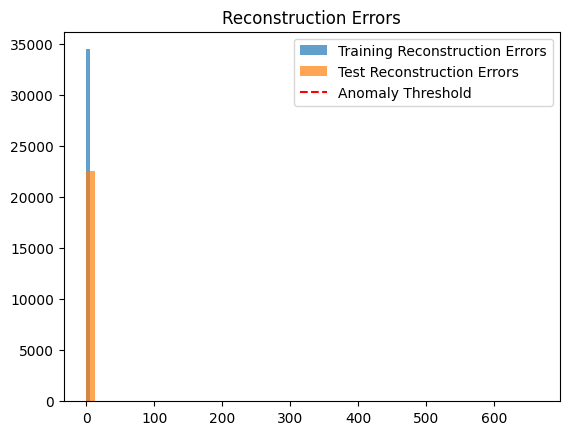

In [ ]:
import matplotlib.pyplot as plt

plt.hist(train_errors, bins=50, alpha=0.7, label="Training Reconstruction Errors")
plt.hist(test_errors, bins=50, alpha=0.7, label="Test Reconstruction Errors")
plt.axvline(threshold, color='r', linestyle='--', label='Anomaly Threshold')
plt.legend()
plt.title("Reconstruction Errors")
plt.show()


In [ ]:
# Add reconstruction error as a feature
X_train_features = np.column_stack([X_train, train_errors])
X_test_features = np.column_stack([X_test, test_errors])


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

# Assuming y_test is the original target variable for the test set
encoder = LabelEncoder()
y_test_encoded = encoder.fit_transform(y_test)

# No need to slice y_train_encoded as it's already the correct size
# y_train_encoded = y_train_encoded[:X_train_features.shape[0]]

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_features, y_train_encoded)

# Evaluate the model
y_pred = rf_model.predict(X_test_features)
print(classification_report(y_test_encoded, y_pred,zero_division=1))

              precision    recall  f1-score   support

           0       0.11      0.06      0.08       737
           1       0.00      0.00      0.00       359
           2       0.00      0.00      0.00        20
           3       1.00      0.00      0.00         3
           4       1.00      0.00      0.00      1231
           5       0.00      0.00      0.00       133
           6       0.00      0.00      0.00         1
           7       1.00      0.00      0.00       141
           8       0.00      0.00      0.00         7
           9       0.00      0.00      0.00         2
          10       0.00      0.00      0.00       293
          11       0.05      0.80      0.10       996
          12       0.00      0.00      0.00        18
          13       0.00      0.00      0.00        17
          14       0.01      0.00      0.00      4657
          15       0.00      0.00      0.00        73
          16       0.12      0.01      0.03      9711
          17       0.00    

In [ ]:
!pip install kafka-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 246.5/246.5 kB 14.8 MB/s eta 0:00:00


In [ ]:
!docker run -d -p 2181:2181 -p 9092:9092 --env ADVERTISED_HOST=localhost --env ADVERTISED_PORT=9092 confluentinc/cp-kafka:7.3.1

/bin/bash: line 1: docker: command not found


In [ ]:
!apt-get update && apt-get install -y netcat

Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:4 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:5 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:9 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ Packages [60.9 kB]
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,226 kB]
Get:13 http://security.ubuntu.com/ubuntu jammy-security/main amd64

In [ ]:
!nc -zv 192.168.1.100 9092

nc: connect to 192.168.1.100 port 9092 (tcp) failed: Connection timed out


In [ ]:
!apt-get update && apt-get install -y iputils-ping


Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading

In [ ]:
!ping 192.168.1.100


PING 192.168.1.100 (192.168.1.100) 56(84) bytes of data.

--- 192.168.1.100 ping statistics ---
396 packets transmitted, 0 received, 100% packet loss, time 404475ms



In [ ]:
!bin/zookeeper-server-start.sh config/zookeeper.properties

/bin/bash: line 1: bin/zookeeper-server-start.sh: No such file or directory


In [ ]:
!bin/kafka-server-start.sh config/server.properties

/bin/bash: line 1: bin/kafka-server-start.sh: No such file or directory


In [ ]:
!bin/kafka-topics.sh --create --topic network_traffic --bootstrap-server localhost:9092 --partitions 1 --replication-factor 1

/bin/bash: line 1: bin/kafka-topics.sh: No such file or directory


In [ ]:
!bin/kafka-topics.sh --list --bootstrap-server localhost:9092

/bin/bash: line 1: bin/kafka-topics.sh: No such file or directory


In [ ]:
!pip install kafka-python


In [ ]:
import json
import time
import random
from queue import Queue  # Use a Python queue to simulate the Kafka topic

# Simulated Kafka topic as a queue
kafka_topic = Queue()

# Simulated Network Log Generator
def generate_network_data():
    protocols = ['TCP', 'UDP', 'ICMP']
    return {
        "Timestamp": time.strftime("%Y-%m-%d %H:%M:%S"),
        "Source_IP": f"192.168.1.{random.randint(1, 255)}",
        "Destination_IP": f"192.168.1.{random.randint(1, 255)}",
        "Protocol": random.choice(protocols),
        "Message": "Simulated network log"
    }

# Simulate Producer
for _ in range(10):  # Produce 10 messages (or run infinitely with while True)
    network_log = generate_network_data()
    kafka_topic.put(json.dumps(network_log))  # Send message to the 'Kafka topic'
    print(f"Produced: {network_log}")
    time.sleep(1)


Produced: {'Timestamp': '2024-12-17 15:07:44', 'Source_IP': '192.168.1.105', 'Destination_IP': '192.168.1.118', 'Protocol': 'TCP', 'Message': 'Simulated network log'}
Produced: {'Timestamp': '2024-12-17 15:07:45', 'Source_IP': '192.168.1.143', 'Destination_IP': '192.168.1.184', 'Protocol': 'ICMP', 'Message': 'Simulated network log'}
Produced: {'Timestamp': '2024-12-17 15:07:46', 'Source_IP': '192.168.1.26', 'Destination_IP': '192.168.1.115', 'Protocol': 'TCP', 'Message': 'Simulated network log'}
Produced: {'Timestamp': '2024-12-17 15:07:47', 'Source_IP': '192.168.1.202', 'Destination_IP': '192.168.1.38', 'Protocol': 'TCP', 'Message': 'Simulated network log'}
Produced: {'Timestamp': '2024-12-17 15:07:48', 'Source_IP': '192.168.1.171', 'Destination_IP': '192.168.1.88', 'Protocol': 'ICMP', 'Message': 'Simulated network log'}
Produced: {'Timestamp': '2024-12-17 15:07:49', 'Source_IP': '192.168.1.198', 'Destination_IP': '192.168.1.24', 'Protocol': 'TCP', 'Message': 'Simulated network log'}


In [ ]:
from tensorflow.keras.models import load_model
import numpy as np
import json
from tensorflow.keras.losses import MeanSquaredError # Import MeanSquaredError

# Load the pre-trained Autoencoder model
# Assume you've already trained the model and saved it as 'autoencoder.h5'
autoencoder = load_model('models/autoencoder.h5', custom_objects={'mse': MeanSquaredError}) # Specify MeanSquaredError

# Simulated Consumer
while not kafka_topic.empty():  # Read messages until the queue is empty
    message = kafka_topic.get()  # Fetch the next 'Kafka' message
    network_log = json.loads(message)
    print(f"Consumed: {network_log}")

    # Convert log into features (customize this feature extraction logic)
    # Ensure the feature extraction logic matches the training data
    # You need to extract 120 features instead of 5.
    # This is a placeholder - you'll need to replace with your actual feature extraction
    # based on the features used during training.

    # Example: Assume the first 3 features are IP lengths and protocol type
    features = [
        len(network_log['Source_IP']),
        len(network_log['Destination_IP']),
        1 if network_log['Protocol'] == 'TCP' else 0,
        1 if network_log['Protocol'] == 'UDP' else 0,
        1 if network_log['Protocol'] == 'ICMP' else 0,
         *([0] * 115)  # Placeholder for remaining 115 features, replace with actual feature extraction
    ]
        # ... extract the remaining 115 features from the network log ...


    features = np.array(features).reshape(1, -1)  # Reshape to (1, 120)

    # Anomaly Detection using the Autoencoder
    reconstruction = autoencoder.predict(features)
    # Instantiate MeanSquaredError and calculate the error
    mse = MeanSquaredError()
    error = mse(features, reconstruction).numpy()

    # Set a threshold for anomaly detection
    threshold = 0.5
    if error > threshold:
        print(f"ALERT: Anomaly Detected! Reconstruction Error = {error:.4f}")
    else:
        print("Normal traffic.")

Consumed: {'Timestamp': '2024-12-17 15:07:46', 'Source_IP': '192.168.1.26', 'Destination_IP': '192.168.1.115', 'Protocol': 'TCP', 'Message': 'Simulated network log'}
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
ALERT: Anomaly Detected! Reconstruction Error = 2.4563
Consumed: {'Timestamp': '2024-12-17 15:07:47', 'Source_IP': '192.168.1.202', 'Destination_IP': '192.168.1.38', 'Protocol': 'TCP', 'Message': 'Simulated network log'}
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
ALERT: Anomaly Detected! Reconstruction Error = 2.4402
Consumed: {'Timestamp': '2024-12-17 15:07:48', 'Source_IP': '192.168.1.171', 'Destination_IP': '192.168.1.88', 'Protocol': 'ICMP', 'Message': 'Simulated network log'}
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
ALERT: Anomaly Detected! Reconstruction Error = 2.4367
Consumed: {'Timestamp': '2024-12-17 15:07:49', 'Source_IP': '192.168.1.198', 'Destination_IP': '192.168.1.24', 'Protocol': 'TCP', 'Message': 'Simulated network log'}
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
ALERT: Anomaly Det

In [81]:
!pip install streamlit
!pip install pyngrok


In [82]:
# Save the code to a Python file
code = """
import streamlit as st
import pandas as pd

# Streamlit dashboard for anomaly detection
st.title("Intrusion Detection System Dashboard")

# Simulated anomaly log
data = {
    "Time": ["2024-06-17 12:00:00", "2024-06-17 12:05:00"],
    "Reconstruction Error": [0.15, 0.23],
    "Anomaly Detected": [True, True]
}
df = pd.DataFrame(data)

st.subheader("Anomaly Logs")
st.table(df)

st.subheader("Reconstruction Error Plot")
st.line_chart([0.02, 0.05, 0.1, 0.3, 0.15])  # Simulated errors over time
"""

with open("streamlit_app.py", "w") as f:
    f.write(code)
print("Streamlit app saved as 'streamlit_app.py'")


Streamlit app saved as 'streamlit_app.py'


In [ ]:
from pyngrok import ngrok

# Run the Streamlit app
!streamlit run streamlit_app.py &

# Expose Streamlit app using ngrok
public_url = ngrok.connect(port='8501')  # Default Streamlit port is 8501
print(f"Streamlit is running on: {public_url}")





  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.150.230.225:8501

